# Exploratory Data Analysis

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Visualization

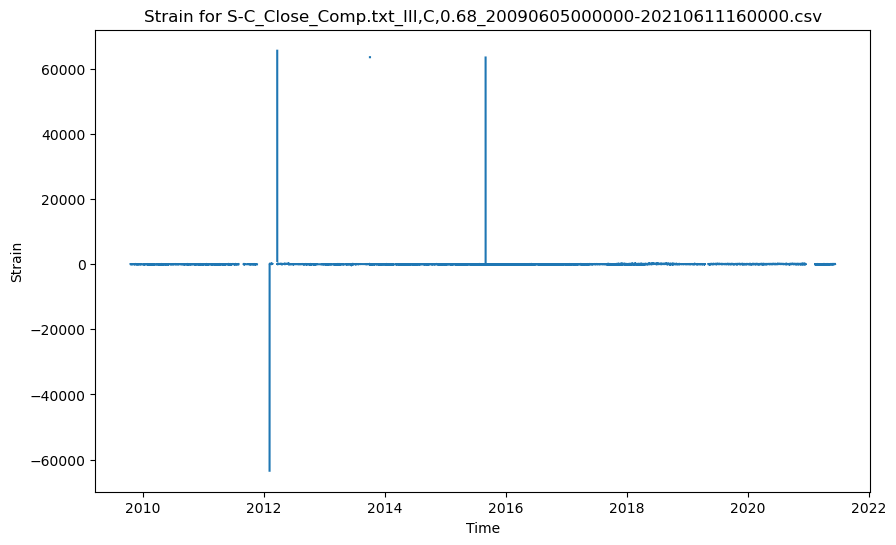

In [153]:
#Visualize the raw data

folder = '../timeseries_csv/' #main folder
file = 'S-C_Close_Comp.txt_III,C,0.68_20090605000000-20210611160000.csv' #file name

df = pd.read_csv(folder + file, parse_dates=['Time'])

#Customized start and end time
#Choose start and end time (start '2009-06-05 00:00:00', end '2021-06-11 16:00:00')
# start_time = '2009-06-05 00:00:00'
# end_time = '2010-06-05 00:00:00'

# df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [154]:
df

Time_index                Time  Strain
0      20090605000000 2009-06-05 00:00:00     NaN
1      20090605040000 2009-06-05 04:00:00     NaN
2      20090605080000 2009-06-05 08:00:00     NaN
3      20090605120000 2009-06-05 12:00:00     NaN
4      20090605160000 2009-06-05 16:00:00     NaN
...               ...                 ...     ...
26334  20210611000000 2021-06-11 00:00:00    50.0
26335  20210611040000 2021-06-11 04:00:00    56.0
26336  20210611080000 2021-06-11 08:00:00    51.0
26337  20210611120000 2021-06-11 12:00:00    55.0
26338  20210611160000 2021-06-11 16:00:00     NaN

[26339 rows x 3 columns]

           Time_index                Time  Strain
808    20091017160000 2009-10-17 16:00:00     0.0
839    20091022200000 2009-10-22 20:00:00     0.0
852    20091025000000 2009-10-25 00:00:00     0.0
869    20091027200000 2009-10-27 20:00:00     0.0
885    20091030120000 2009-10-30 12:00:00     0.0
...               ...                 ...     ...
25869  20210325120000 2021-03-25 12:00:00     0.0
25910  20210401080000 2021-04-01 08:00:00     0.0
26221  20210523040000 2021-05-23 04:00:00     0.0
26248  20210527160000 2021-05-27 16:00:00     0.0
26252  20210528080000 2021-05-28 08:00:00     0.0

[160 rows x 3 columns]


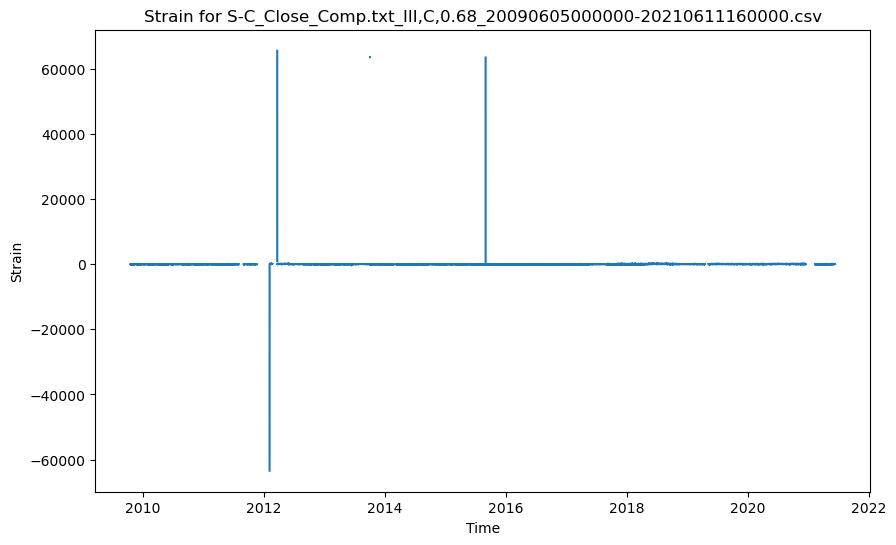

In [155]:
#Find values of strain that are exactly zero and remove them
df_zero = df[df["Strain"] == 0]
print(df_zero)

#Remove rows with strain values of zero and plot
indices_to_remove = df_zero.index
df.loc[indices_to_remove, 'Strain'] = np.nan  # Using np.nan to replace the outlier values
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

### Outliers

Lower bound = -136.0 Extreme lower bound = -247.0
Upper bound = 160.0 Extreme upper bound = 271.0


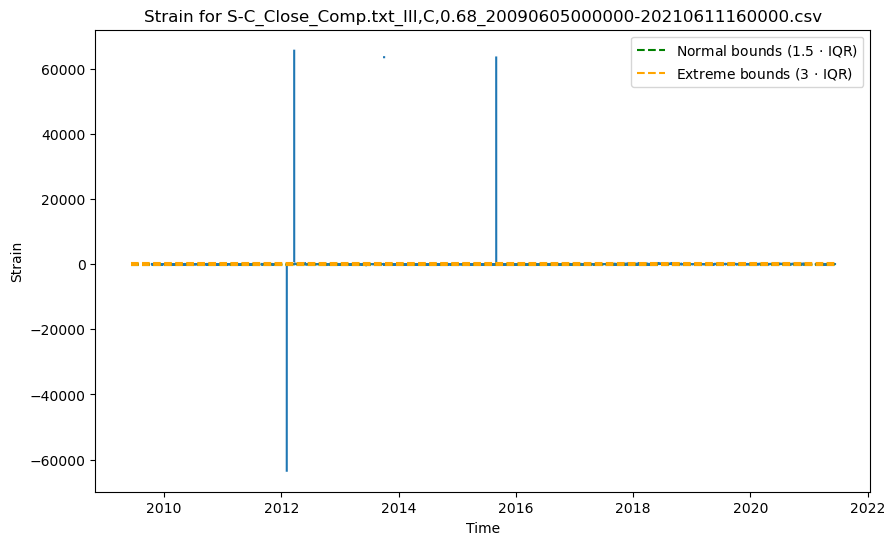

In [156]:
# Compute IQR
Q1 = df['Strain'].quantile(0.25)  # 25th percentile
Q3 = df['Strain'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for extreme outliers
lower_bound = Q1 - 1.5 * IQR
lower_bound_extreme = Q1 - 3 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound_extreme = Q3 + 3 * IQR
print(f'Lower bound = {lower_bound} Extreme lower bound = {lower_bound_extreme}')
print(f'Upper bound = {upper_bound} Extreme upper bound = {upper_bound_extreme}')


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.hlines(y=[lower_bound, upper_bound], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='green', linestyles='dashed', label=r'Normal bounds (1.5 $\cdot$ IQR)')
plt.hlines(y=[lower_bound_extreme, upper_bound_extreme], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='orange', linestyles='dashed', label=r'Extreme bounds (3 $\cdot$ IQR)')
plt.legend()
plt.show()

In [157]:
mild_outliers = df[(df['Strain'] < lower_bound) | (df['Strain'] > upper_bound)]
mild_outlier_indices = mild_outliers.index  # Save the indices of mild outliers
num_mild_outliers = mild_outliers.shape[0]

# Count extreme outliers (outside 3 * IQR)
extreme_outliers = df[(df['Strain'] < lower_bound_extreme) | (df['Strain'] > upper_bound_extreme)]
extreme_outlier_indices = extreme_outliers.index  # Save the indices of extreme outliers
num_extreme_outliers = extreme_outliers.shape[0]

# Print results
print(f'Number of mild outliers (1.5 × IQR): {num_mild_outliers}')
print(f'Number of extreme outliers (3 × IQR): {num_extreme_outliers}')


Number of mild outliers (1.5 × IQR): 76
Number of extreme outliers (3 × IQR): 14


Number of outliers replaced with NaN: 14


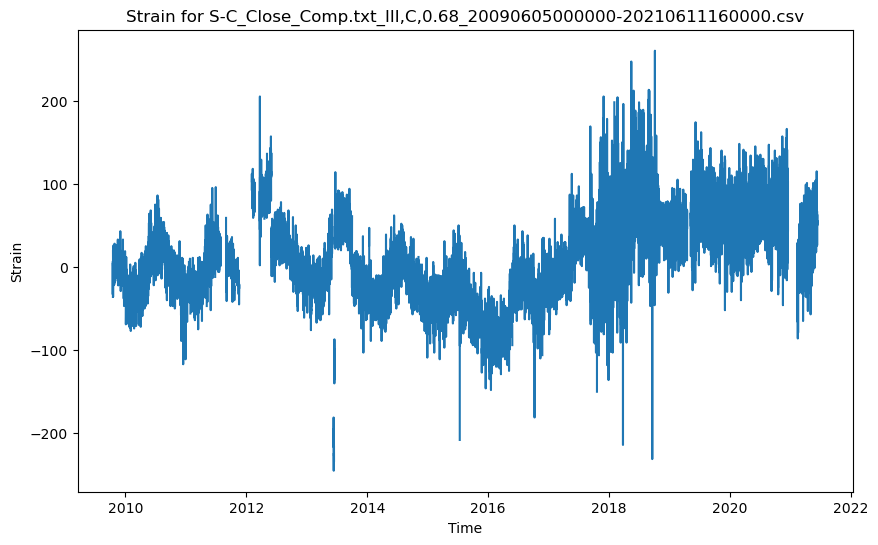

In [158]:
# Replace extreme outliers with NaN
df.loc[extreme_outlier_indices, 'Strain'] = np.nan  # Using np.nan to replace the outlier values
print(f'Number of outliers replaced with NaN: {len(extreme_outlier_indices)}')

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

### Statistics

In [159]:
#Print the statistics of the data
df['Strain'].describe()

count    23243.000000
mean        10.769565
std         49.258755
min       -245.000000
25%        -25.000000
50%          6.000000
75%         49.000000
max        260.000000
Name: Strain, dtype: float64

Text(0.5, 1.0, 'Box Plot of Strain')

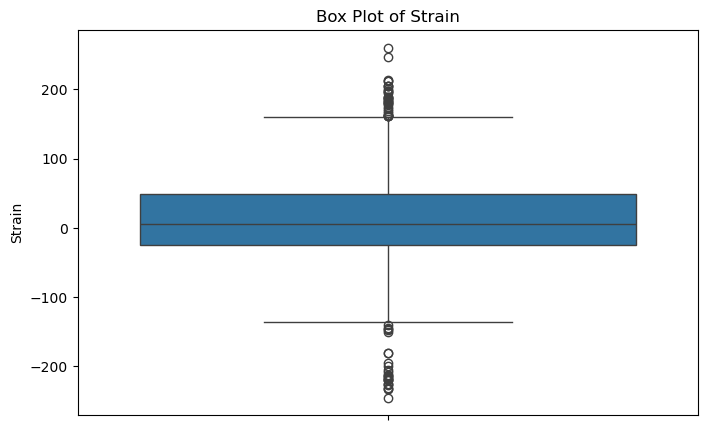

In [160]:
#Boxplot of strain values
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Strain'])

plt.ylabel('Strain')
plt.title(f'Box Plot of Strain')

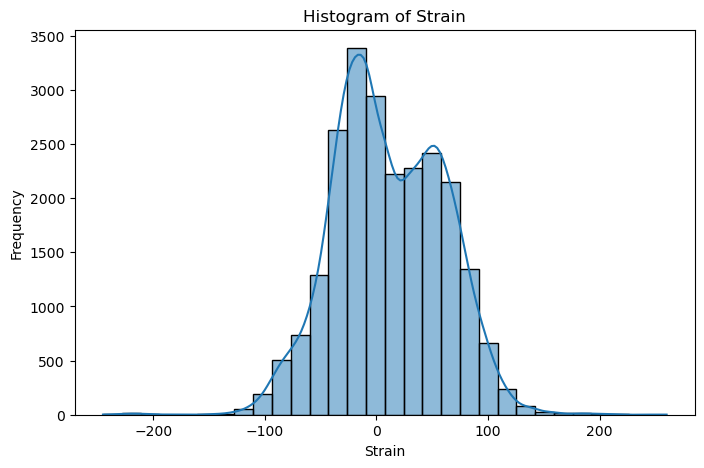

In [161]:
# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Strain'], bins=30, kde=True)  # kde=True adds a density curve

# Labels and title
plt.xlabel('Strain')
plt.ylabel('Frequency')
plt.title('Histogram of Strain')

# Show plot
plt.show()

### Missing values

In [162]:
#Count the number of NaN values in each column
df.isna().sum()

# Get the indices of NaN values in the 'Strain' column
nan_indices = df[df['Strain'].isna()].index.tolist()

nan_indices_with_time = pd.DataFrame({
    # 'Index': nan_indices,
    'Time': df.loc[nan_indices, 'Time']
})

nan_indices_with_time

Time
0     2009-06-05 00:00:00
1     2009-06-05 04:00:00
2     2009-06-05 08:00:00
3     2009-06-05 12:00:00
4     2009-06-05 16:00:00
...                   ...
26266 2021-05-30 16:00:00
26267 2021-05-30 20:00:00
26268 2021-05-31 00:00:00
26269 2021-05-31 04:00:00
26338 2021-06-11 16:00:00

[3096 rows x 1 columns]

In [177]:
# import nan_regions #nan_regions.py
# thresholds = [interpolate_threshold] # Choose the threshold(s) for consecutive NaNs

# for threshold in thresholds:
#     consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)
#     # Plot the data
#     plt.figure(figsize=(50, 6))
#     plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

#     # Shade regions with more than x consecutive NaNs
#     for start, end in consecutive_nan_regions:
#         plt.axvspan(df['Time'].loc[start], df['Time'].loc[end], color='red', alpha=0.3)

#     # Labels and title
#     plt.xlabel('Time')
#     plt.ylabel('Strain')
#     plt.title(f'Regions of more than {threshold} consecutive NaNs \n{file}')
#     plt.legend()
    
#     for column in nan_regions_sorted:
#         print(f"Lenght: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")
#     plt.show() 

import nan_regions #nan_regions.py
import plotly.graph_objects as go

thresholds = [6] # Choose the threshold(s) for consecutive NaNs
consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=3)
for threshold in thresholds:
    fig = go.Figure()

    # Add traces
    fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

    # Shade regions with NaNs
    for start, end in consecutive_nan_regions:
        fig.add_vrect(x0=df['Time'].loc[start], x1=df['Time'].loc[end], fillcolor='red', opacity=0.3, line_width=0)

    # Labels and title
    fig.update_layout(
        title=f'Regions of more than {threshold} consecutive NaNs \n{file}',
        xaxis_title='Time',
        yaxis_title='Strain',
        # Enable pan, zoom, and reset tools
        dragmode="zoom",  # Optional: you can set this to "pan" for default pan mode
        xaxis_rangeslider_visible=True  # Optional: adds a range slider at the bottom
    )

    for column in nan_regions_sorted:
        print(f"Lenght: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")
        plt.show()
    # Show figure
    fig.show()

Lenght: 800, Start Time: 2009-06-05 00:00:00, End Time: 2009-10-16 04:00:00
Lenght: 329, Start Time: 2012-07-18 12:00:00, End Time: 2012-09-11 04:00:00
Lenght: 109, Start Time: 2012-09-21 08:00:00, End Time: 2012-10-09 08:00:00
Lenght: 86, Start Time: 2015-09-04 04:00:00, End Time: 2015-09-18 08:00:00
Lenght: 67, Start Time: 2014-07-11 12:00:00, End Time: 2014-07-22 12:00:00
Lenght: 42, Start Time: 2013-06-03 08:00:00, End Time: 2013-06-10 04:00:00
Lenght: 41, Start Time: 2014-11-06 12:00:00, End Time: 2014-11-13 04:00:00
Lenght: 24, Start Time: 2011-11-25 12:00:00, End Time: 2011-11-29 08:00:00
Lenght: 22, Start Time: 2013-11-21 20:00:00, End Time: 2013-11-25 08:00:00
Lenght: 21, Start Time: 2011-04-04 00:00:00, End Time: 2011-04-07 08:00:00
Lenght: 21, Start Time: 2017-09-03 08:00:00, End Time: 2017-09-06 16:00:00
Lenght: 19, Start Time: 2011-10-28 04:00:00, End Time: 2011-10-31 04:00:00
Lenght: 19, Start Time: 2017-09-15 12:00:00, End Time: 2017-09-18 12:00:00
Lenght: 18, Start Time

In [164]:
import interpolate_nan #interpolate_nan.py

interpolate_threshold = 6
df_filled = interpolate_nan.interpolate(df, nan_regions_sorted, interpolate_threshold)
df = df_filled

Region to fill: 
   Length: 6 steps
   Start Time: 2011-01-11 12:00:00
   End Time: 2011-01-12 08:00:00
3512
Both indices (3512, 3519) are valid -> interpolate 6 steps
target: 3513
Interpolated value at index 3513: -25.571428571428573
target: 3514
Interpolated value at index 3514: -27.142857142857142
target: 3515
Interpolated value at index 3515: -28.714285714285715
target: 3516
Interpolated value at index 3516: -30.285714285714285
target: 3517
Interpolated value at index 3517: -31.857142857142858
target: 3518
Interpolated value at index 3518: -33.42857142857143
Start value: -24.0
End value: -35.0 

Region to fill: 
   Length: 6 steps
   Start Time: 2011-07-21 12:00:00
   End Time: 2011-07-22 08:00:00
4658
Both indices (4658, 4665) are valid -> interpolate 6 steps
target: 4659
Interpolated value at index 4659: 13.285714285714285
target: 4660
Interpolated value at index 4660: 10.571428571428571
target: 4661
Interpolated value at index 4661: 7.857142857142858
target: 4662
Interpolated va

In [165]:
import os
import pandas as pd

path = '../timeseries_csv/comparisons/'

# Get the names of CSV files in the folder
files = [
    name for name in os.listdir(path)
    if os.path.isfile(os.path.join(path, name)) and name.endswith('.csv')  # Check for CSV files
]

print(f'Found {len(files)} files in the folder {path} \nFiles: {files}')

Found 6 files in the folder ../timeseries_csv/comparisons/ 
Files: ['N-B_Far_Comp.txt_N13, B, 0.03_20090605000000-20210611160000.csv', 'N-B_Mid1_Comp.txt_N5, B, 0.02_20090605000000-20210611160000.csv', 'N-C_Close1_Comp.txt_VIII, C, 0.06_20090605000000-20210611160000.csv', 'N-C_Close2_Comp.txt_IX, C, 0.09_20090605000000-20210611160000.csv', 'S-E_Tunnel_Comp.txt_S19, E, 0.06_20090605000000-20210611160000.csv', 'S-F_Close_Comp.txt_II, F, 0.06_20090605000000-20210611160000.csv']


In [166]:
files = ['N-B_Far_Comp.txt_N13, B, 0.03_20090605000000-20210611160000.csv',
         'N-B_Mid1_Comp.txt_N5, B, 0.02_20090605000000-20210611160000.csv', 
         'N-C_Close2_Comp.txt_IX, C, 0.09_20090605000000-20210611160000.csv']

In [167]:
folder = '../timeseries_csv/'
dfs = {}

for i, filename in enumerate(files):
    file_path = path + filename
    try:
        dfs[f"df{i+1}"] = pd.read_csv(file_path, parse_dates=['Time'])
        print(f"Loaded: {filename} as dfs['df{i+1}']")
    except FileNotFoundError:
        print(f"The file was not found: {file_path}")

Loaded: N-B_Far_Comp.txt_N13, B, 0.03_20090605000000-20210611160000.csv as dfs['df1']
Loaded: N-B_Mid1_Comp.txt_N5, B, 0.02_20090605000000-20210611160000.csv as dfs['df2']
Loaded: N-C_Close2_Comp.txt_IX, C, 0.09_20090605000000-20210611160000.csv as dfs['df3']


In [168]:
import preprocessing

interpolate_threshold = 6
for name in dfs:
    print(f'----{name}')
    dfs[name] = preprocessing.clean_zeros_outliers_interpolate(dfs[name], interpolate_threshold)


----df1
145 zeros to replace with NaN
Number of mild outliers (1.5 × IQR): 106
Number of extreme outliers (3 × IQR): 11
Number of outliers replaced with NaN: 106
Region to fill: 
   Length: 6 steps
   Start Time: 2012-03-20 12:00:00
   End Time: 2012-03-21 08:00:00
6116
Both indices (6116, 6123) are valid -> interpolate 6 steps
target: 6117
Interpolated value at index 6117: -22.428571428571427
target: 6118
Interpolated value at index 6118: -21.857142857142858
target: 6119
Interpolated value at index 6119: -21.285714285714285
target: 6120
Interpolated value at index 6120: -20.714285714285715
target: 6121
Interpolated value at index 6121: -20.142857142857142
target: 6122
Interpolated value at index 6122: -19.571428571428573
Start value: -23.0
End value: -19.0 

Region to fill: 
   Length: 6 steps
   Start Time: 2014-01-07 20:00:00
   End Time: 2014-01-08 16:00:00
10066
Both indices (10066, 10073) are valid -> interpolate 6 steps
target: 10067
Interpolated value at index 10067: -99.0
targ

In [ ]:
def valid_regions(df, threshold_valid):
    valid_indices = df[df['Strain'].notna()].index.tolist()
    consecutive_valid_regions = []
    start_idx = None

    for i in range(len(valid_indices)):
        if start_idx is None:
            start_idx = valid_indices[i]
        if i == len(valid_indices) - 1 or valid_indices[i] + 1 != valid_indices[i + 1]:
            end_idx = valid_indices[i]
            if (end_idx - start_idx + 1) >= threshold_valid:  # Threshold for region length
                consecutive_valid_regions.append((start_idx, end_idx))
            start_idx = None

    valid_regions_sorted = [
            (start, end, df.loc[start, 'Time'], df.loc[end, 'Time'], end - start + 1)
            for start, end in consecutive_valid_regions
        ]
    
    valid_regions_sorted.sort(key=lambda x: x[4], reverse=True)

    return consecutive_valid_regions
        
        
# threshold_valid = 400

# consecutive_valid_regions = valid_regions(df,threshold_valid)

# fig = go.Figure()
#     # Add traces
# fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

# # Shade regions with NaNs
# for start, end in consecutive_valid_regions:
#     fig.add_vrect(x0=df['Time'].loc[start], x1=df['Time'].loc[end], fillcolor='green', opacity=0.3, line_width=0)

# # Labels and title
# fig.update_layout(
#     title=f'Consecutive regions of more than {threshold_valid} valid values (imputed up to {interpolate_threshold} steps) <br> {file}',
#     xaxis_title='Time',
#     yaxis_title='Strain',
#     # Enable pan, zoom, and reset tools
#     # dragmode="zoom",  # Optional: you can set this to "pan" for default pan mode
#     xaxis_rangeslider_visible=True  # Optional: adds a range slider at the bottom
# )   

# # Show figure
# fig.show()

In [176]:
import plotly.graph_objects as go
import sys

threshold_valid = 300  # Apply threshold after finding overlapping regions
consecutive_regions_dict = {}  # Store consecutive valid regions for each dataset

# Compute valid regions for each dataset
for name, df in dfs.items():
    consecutive_valid_regions = valid_regions(df, threshold_valid)
    consecutive_regions_dict[name] = consecutive_valid_regions

    fig = go.Figure()
    fig.update_layout(width=1600, height=400)  # Set figure size
    # Add traces
    fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

    # Shade regions with NaNs
    for start, end in consecutive_valid_regions:
        fig.add_vrect(x0=df['Time'].loc[start], x1=df['Time'].loc[end], fillcolor='green', opacity=0.3, line_width=0)

    # Labels and title
    fig.update_layout(
        # title=f'Consecutive regions of more than {threshold_valid} valid values (imputed up to {interpolate_threshold} steps) <br> {file}',
        xaxis_title='Time',
        yaxis_title='Strain',
        # Enable pan, zoom, and reset tools
        # dragmode="zoom",  # Optional: you can set this to "pan" for default pan mode
        xaxis_rangeslider_visible=True  # Optional: adds a range slider at the bottom
    )   

    # Show figure
    fig.show()

def find_overlapping_regions(*series_regions):
    """
    Find overlapping regions where all time series overlap.
    
    Args:
        *series_regions: Variable number of lists with (start, end) tuples for each time series.
        
    Returns:
        overlapping_regions: List of (start, end) tuples where all series overlap.
    """
    if not series_regions:
        return []

    overlapping_regions = series_regions[0]  # Start with the first series' valid regions

    for regions in series_regions[1:]:
        new_overlapping = []
        for s1, e1 in overlapping_regions:
            for s2, e2 in regions:
                # Compute overlap between two regions
                start_overlap = max(s1, s2)
                end_overlap = min(e1, e2)

                # If a valid overlap exists, store it
                if start_overlap <= end_overlap:
                    new_overlapping.append((start_overlap, end_overlap))

        overlapping_regions = new_overlapping  # Update overlapping regions

        if not overlapping_regions:  # Stop if no overlapping region remains
            break

    return overlapping_regions

# Compute overlapping regions across all datasets
overlapping_regions = find_overlapping_regions(*consecutive_regions_dict.values())

# **Apply threshold on overlapping regions**
filtered_overlapping_regions = [
    (start, end) for start, end in overlapping_regions if (end - start) >= threshold_valid
]

filtered_overlapping_regions = np.array(filtered_overlapping_regions)  # Convert list to NumPy array
if overlapping_regions != []:
    filtered_overlapping_regions_length = filtered_overlapping_regions[:, 1] - filtered_overlapping_regions[:, 0]
    print(f'Found {len(filtered_overlapping_regions_length)} overlapping regions with the lengths >{threshold_valid}: {filtered_overlapping_regions_length}')
else: 
    print('No overlapping regions found')

# Create figure
fig = go.Figure()
fig.update_layout(width=1600, height=600)  # Set figure size

# Add each time series to the figure
for name, df in dfs.items():
    fig.add_trace(go.Scatter(
        x=df['Time'], 
        y=df['Strain'], 
        mode='lines', 
        name=name  # Dynamic name
    ))

# Highlight the filtered overlapping regions
for start, end in filtered_overlapping_regions:
    fig.add_vrect(
        x0=dfs['df1']['Time'].loc[start],  # Use first df for time axis reference
        x1=dfs['df1']['Time'].loc[end], 
        fillcolor='green', 
        opacity=0.3, 
        line_width=0
    )

# Layout settings
fig.update_layout(
    title=f'Overlapping regions of more than {threshold_valid} valid values (imputed up to {interpolate_threshold} steps)',
    xaxis_title='Time',
    yaxis_title='Strain',
    xaxis_rangeslider_visible=True
)

# Show figure
fig.show()

Found 19 overlapping regions with the lengths >300: [3031  551  344  671  432  346 1066  924  737  323  387 1365 1486 1430
 1302 2021 1038 3973  569]


### Availability of data

In [171]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates

# def heatmap(loops_to_keep):
#     # Read and process data
#     df = pd.read_csv('txt/filelist.txt', delimiter=',', header=None)
#     df.rename(columns={df.columns[0]: 'Date_path'}, inplace=True)
#     df['Datetime'] = pd.to_datetime(df['Date_path'], format='%Y%m%d%H%M%S')
#     df.rename(columns={df.columns[1]: 'Loop'}, inplace=True)
#     dates = df['Datetime'].unique()

#     loop_counts = df['Loop'].value_counts()
#     print(f'Number of channels: {len(loop_counts)}')

#     if loops_to_keep == 'all':
#         # Keep all rows if 'all' is selected
#         pass
#     elif isinstance(loops_to_keep, str) and loops_to_keep.endswith('.txt'):
#         # If it's a file path, read the loop names from the file
#         with open(loops_to_keep, 'r') as f:
#             loops_to_keep = [line.strip() for line in f.readlines()]  # Read and clean loop names
#         # Filter the DataFrame to only keep the rows with the loops in the 'loops_to_keep' list
#         df = df[df['Loop'].isin(loops_to_keep)]
#     else:
#         # If it's a list of loop names, use that list
#         df = df[df['Loop'].isin(loops_to_keep)]

#     # Create a boolean matrix using pivot_table()
#     boolean_matrix = df.pivot_table(index='Loop', columns='Datetime', aggfunc=lambda x: 1, fill_value=0)
#     boolean_matrix.columns = boolean_matrix.columns.droplevel(0)  # Drop the 'Date_path' level

#     # Plot heatmap with horizontal lines only
#     plt.figure(figsize=(160, 0.3*len(loops_to_keep)))
#     ax = sns.heatmap(boolean_matrix, cmap="Blues", cbar=False)

#     plt.title("Availability of Data Over Time")

#     # Ensure labels are not rotated
#     step = int(len(dates) / (len(dates)/30.5/6))
#     ax.set_xticks(range(235, len(dates), step))  # Set ticks at intervals (235 is when September begins so that the ticks are at the beginning of each month)
#     ax.set_xticklabels([dates[i].strftime('%Y-%m') for i in range(235, len(dates), step)], rotation=90, fontsize=30)

#     ax.hlines(y=[i + 1 for i in range(len(boolean_matrix))], xmin=0, xmax=len(boolean_matrix.columns), color='black', linewidth=0.5)

#     ax.set_yticklabels(boolean_matrix.index, rotation=0)

#     # Show plot
#     plt.show()


# # Define the option to read loops from a text file or specify 'all'
# # loops_to_keep = 'N-B_Far_Comp.txt'  # Option: 'all' or path to a text file (e.g., 'loops.txt')
# loops_to_keep = 'txt/comp_loops_notEI_filtered.txt'  # Option: 'all' or path to a text file (e.g., 'loops.txt')
# title = 'Heatmap'
# heatmap(loops_to_keep)

In [172]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates

# def heatmap(loops_to_keep):

#     # Ensure loops_to_keep is a list, even if it's a single string
#     if isinstance(loops_to_keep, str):
#         loops_to_keep = [loops_to_keep]

#     # Read and process data
#     df = pd.read_csv('txt/filelist.txt', delimiter=',', header=None)
#     df.rename(columns={df.columns[0]: 'Date_path'}, inplace=True)
#     df['Datetime'] = pd.to_datetime(df['Date_path'], format='%Y%m%d%H%M%S')
#     df.rename(columns={df.columns[1]: 'Loop'}, inplace=True)
#     dates = df['Datetime'].unique()

#     loop_counts = df['Loop'].value_counts()
#     print(f'Number of channels: {len(loop_counts)}')

#     print(type(loops_to_keep))

#     df = df[df['Loop'].isin(loops_to_keep)]

#     # Create a boolean matrix using pivot_table()
#     boolean_matrix = df.pivot_table(index='Loop', columns='Datetime', aggfunc=lambda x: 1, fill_value=0)
#     boolean_matrix.columns = boolean_matrix.columns.droplevel(0)  # Drop the 'Date_path' level

#     # Plot heatmap with horizontal lines only
#     plt.figure(figsize=(160, 0.3*len(loops_to_keep)))
#     ax = sns.heatmap(boolean_matrix, cmap="Blues", cbar=False)

#     plt.title("Availability of Data Over Time")

#     # Ensure labels are not rotated
#     step = int(len(dates) / (len(dates)/30.5/6))
#     ax.set_xticks(range(235, len(dates), step))  # Set ticks at intervals (235 is when September begins so that the ticks are at the beginning of each month)
#     ax.set_xticklabels([dates[i].strftime('%Y-%m') for i in range(235, len(dates), step)], rotation=90, fontsize=30)

#     ax.hlines(y=[i + 1 for i in range(len(boolean_matrix))], xmin=0, xmax=len(boolean_matrix.columns), color='black', linewidth=0.5)

#     ax.set_yticklabels(boolean_matrix.index, rotation=0)

#     # Show plot
#     plt.show()


# # Define the option to read loops from a text file or specify 'all'
# # Read the loop names from the .txt file before calling the function
# # with open('txt/comp_loops_notEI_filtered1.txt', 'r') as f:
# #     loops_to_keep = [line.strip() for line in f.readlines()]
# loops_to_keep = ['N-B_Far_Comp.txt', 'N-Klaff_Comp.txt']  # Option: 'all' or path to a text file (e.g., 'loops.txt')
# print(f'Loops to keep: {loops_to_keep}')
# heatmap(loops_to_keep)